In [97]:
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_boston
%matplotlib inline

dataset = load_boston()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.sample(5)

/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
469,13.07510,0.0,18.10,0.0,0.580,5.713,56.7,2.8237,24.0,666.0,20.2,396.90,14.76
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
59,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35
228,0.29819,0.0,6.20,0.0,0.504,7.686,17.0,3.3751,8.0,307.0,17.4,377.51,3.92


In [98]:
df['MEDV'] = dataset.target
df = shuffle(df)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
112,0.12329,0.0,10.01,0.0,0.5470,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21,18.8
25,0.84054,0.0,8.14,0.0,0.5380,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51,13.9
208,0.13587,0.0,10.59,1.0,0.4890,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66,24.4
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
53,0.04981,21.0,5.64,0.0,0.4390,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43,23.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0.53412,20.0,3.97,0.0,0.6470,7.520,89.4,2.1398,5.0,264.0,13.0,388.37,7.26,43.1
401,14.23620,0.0,18.10,0.0,0.6930,6.343,100.0,1.5741,24.0,666.0,20.2,396.90,20.32,7.2
40,0.03359,75.0,2.95,0.0,0.4280,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,34.9
110,0.10793,0.0,8.56,0.0,0.5200,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00,21.7


In [99]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y=df['MEDV']
X

,LSTAT,RM
0,16.21,5.913
1,16.51,5.599
2,14.66,6.064
3,5.33,7.147
4,8.43,5.998
...,...,...
501,7.26,7.520
502,20.32,6.343
503,1.98,7.024
504,13.00,6.195


In [100]:
X = preprocessing.scale(X)  
Y = preprocessing.scale(Y)
X,Y

(array([[ 0.49858928, -0.52945215],
        [ 0.54064142, -0.97679498],
        [ 0.28131992, -0.31432869],
        ...,
        [-1.49608365,  1.05334363],
        [ 0.04863144, -0.12769841],
        [-1.23956563,  2.23438568]]),
 array([-0.40626922, -0.93957286,  0.20322065,  1.48750288,  0.09438317,
        -0.98310786, -0.43892047,  0.24675564,  0.82359427, -0.01445431,
         1.60722411,  1.18275795, -0.2647805 ,  0.12703442, -0.0362218 ,
         2.1514115 , -1.00487535, -0.01445431, -1.69055146,  2.98946007,
        -0.5368742 ,  0.30117438, -1.09194533,  0.00731319,  0.14880191,
        -1.84292393,  0.61680306, -1.30962029, -0.10152429, -0.39538548,
         0.14880191, -0.24301301, -0.35185049,  2.8588551 ,  1.16099045,
        -1.76673769, -0.47157171,  2.98946007,  0.05084818,  2.98946007,
         1.75959658,  0.08349942,  0.14880191, -0.12329178, -0.24301301,
         1.03038548,  0.13791816,  0.84536177, -0.35185049, -0.55864169,
        -0.44980422, -0.15594303,  0.98

In [101]:
X.T

array([[ 0.49858928,  0.54064142,  0.28131992, ..., -1.49608365,
         0.04863144, -1.23956563],
       [-0.52945215, -0.97679498, -0.31432869, ...,  1.05334363,
        -0.12769841,  2.23438568]])

In [102]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    
    numbers_of_features = X.shape[1]  #which is 2
    
    w = np.ones(shape=(numbers_of_features))  #for weight
    b = 0 #bias
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        
        y_predicted = np.dot(w, X.T) + b # 矩阵乘法 y_p = w1*f1 + w2*f2
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) #与真实值的差距
    
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w ,b ,cost ,cost_list ,epoch_list
    
    
w, b, cost, cost_list, epoch_list = batch_gradient_descent(X,Y,1000)
w, b, cost

(array([-0.49830443,  0.38967136]),
 -3.2209632414026045e-15,
 0.36143855443454403)

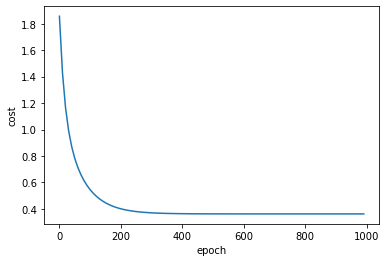

In [103]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [108]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(14.66,6.064,w,b)

<class 'sklearn.exceptions.NotFittedError'>: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.